# Clustering stocks using KMeans

Instructions:

- Import Normalizer from sklearn.preprocessing.
- Load Data
- Create an instance of Normalizer called normalizer.
- Create an instance of KMeans called kmeans with 10 clusters.
- Using make_pipeline(), create a pipeline called pipeline that chains normalizer and kmeans.
- Fit the pipeline to the movements array.

In [1]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

In [2]:
# Import pandas
import pandas as pd

In [4]:
#Import K-means
from sklearn.cluster import KMeans

In [5]:
#Import make_pipeline
from sklearn.pipeline import make_pipeline
#pipeline = make_pipeline(scaler, model)

In [6]:
#import pyplot
import matplotlib.pyplot as plt

In [7]:
#load data from data_UFAZ/TP3/company-stock-movements-2010-2015-incl.csv
df =  pd.read_csv("company-stock-movements-2010-2015-incl.csv")

In [8]:
#show head data
print(df.head)

<bound method NDFrame.head of                             Unnamed: 0  2010-01-04  2010-01-05  2010-01-06  \
0                                Apple    0.580000   -0.220005   -3.409998   
1                                  AIG   -0.640002   -0.650000   -0.210001   
2                               Amazon   -2.350006    1.260009   -2.350006   
3                     American express    0.109997    0.000000    0.260002   
4                               Boeing    0.459999    1.770000    1.549999   
5                      Bank of America    0.450000    0.460001    0.180000   
6             British American Tobacco    0.180000    0.220001    0.040001   
7                                Canon    0.730000    0.369999   -0.099999   
8                          Caterpillar    0.899997    0.700001    0.250000   
9                    Colgate-Palmolive    0.360000    0.909996   -0.290001   
10                      ConocoPhillips    0.809991   -0.020006    0.340003   
11                               C

In [15]:
#Extract all movements and all companies from the data frame using df.iloc
movements =df.iloc[:, 1:]
companies = df.iloc[:, 0]

In [16]:
#print movements
print(movements)

    2010-01-04  2010-01-05  2010-01-06  2010-01-07  2010-01-08  2010-01-11  \
0     0.580000   -0.220005   -3.409998   -1.170000    1.680011   -2.689994   
1    -0.640002   -0.650000   -0.210001   -0.420000    0.710001   -0.200001   
2    -2.350006    1.260009   -2.350006   -2.009995    2.960006   -2.309997   
3     0.109997    0.000000    0.260002    0.720002    0.190003   -0.270001   
4     0.459999    1.770000    1.549999    2.690003    0.059997   -1.080002   
5     0.450000    0.460001    0.180000    0.250000   -0.199999   -0.060000   
6     0.180000    0.220001    0.040001    0.250000   -0.360001   -0.099999   
7     0.730000    0.369999   -0.099999   -0.169999    0.030003    0.110001   
8     0.899997    0.700001    0.250000    0.369999    1.090000    3.179996   
9     0.360000    0.909996   -0.290001   -0.059998    1.300003    0.510003   
10    0.809991   -0.020006    0.340003    0.089988    0.650006    0.029999   
11    0.580000   -0.020000   -0.120001    0.230002    0.280001  

In [17]:
#print(companies)
print(companies)

0                                  Apple
1                                    AIG
2                                 Amazon
3                       American express
4                                 Boeing
5                        Bank of America
6               British American Tobacco
7                                  Canon
8                            Caterpillar
9                      Colgate-Palmolive
10                        ConocoPhillips
11                                 Cisco
12                               Chevron
13                     DuPont de Nemours
14                                  Dell
15                                  Ford
16                     General Electrics
17                       Google/Alphabet
18                         Goldman Sachs
19                       GlaxoSmithKline
20                            Home Depot
21                                 Honda
22                                    HP
23                                   IBM
24              

In [27]:
# Create an instance of KMeans called kmeans with k clusters; the range of k is [3,15]. Find the inertias for each values of k. Plot inertia and k. Select the best k based on inertia values.

k_range = range(3, 16)
inertias = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(movements)
    inertias.append(kmeans.inertia_)

# Select the best k based on inertia values
best_k = k_range[inertias.index(min(inertias))]
print("Best k based on inertia values:", best_k)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\A

Best k based on inertia values: 15


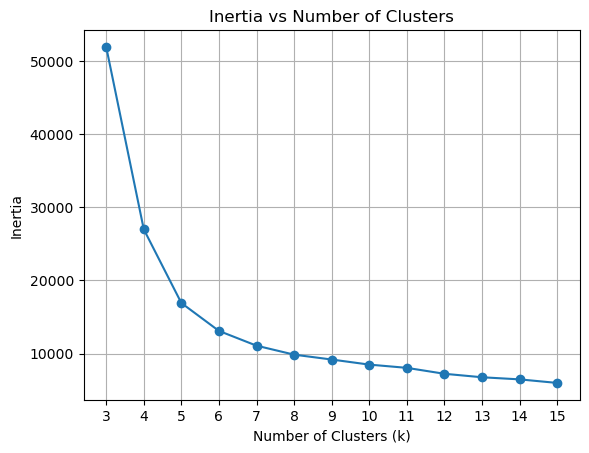

In [28]:
# Plot inertia vs k
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [29]:
# Create a KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=best_k)

In [30]:
# Create a normalizer: normalizer
normalizer = Normalizer()

In [31]:
# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(Normalizer(), kmeans)

In [32]:
# Fit pipeline to the daily price movements
pipeline.fit(movements)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=15))])

In [33]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

In [37]:
# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

In [38]:
#show confusion matrix
ct = pd.crosstab(df['labels'], df['companies'])
print(ct)

companies  3M  AIG  Amazon  American express  Apple  Bank of America  Boeing  \
labels                                                                         
0           0    0       0                 0      0                0       0   
1           1    0       0                 1      0                0       1   
2           0    0       0                 0      0                0       0   
3           0    0       0                 0      0                0       0   
4           0    0       0                 0      0                0       0   
5           0    0       0                 0      0                0       0   
6           0    1       0                 0      0                1       0   
7           0    0       0                 0      0                0       0   
8           0    0       0                 0      0                0       0   
9           0    0       0                 0      0                0       0   
10          0    0       0              